Importing Libraries

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


Loadig data into the notebook

In [108]:
df=pd.read_csv('100_Sales.csv')

In [109]:
df

Region                Country        Item_Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub_Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub_Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub_Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub_Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub_Saharan Africa             Mozambique        Household   

   Sales_Channel Order_Priority   Ship_Date  Unit_Cost  Total_Revenue  \
0        Offline              H  27/06/2010     159.42     2533654.00   
1         Online              C  15/09/2012     117.11      576782.80   
2        Offline              L  05/08/2014     524.96     1158502.59   
3         Online              C  07/05/2014       6.92       75591.66   
4        Offline              L  02/06/2013     524.96     3296425.02   
..           ...            ...         ...        ...            ...   
95        Online              M  09/03/2011      35.84       97040.64   
96       Offline              L  28/12/2011       6.92       58471.11   
97       Offline              C  29/06/2016      90.93      228779.10   
98       Offline              M  08/08/2015      56.67      471336.91   
99       Offline              L  15/02/2012     502.54     3586605.09   

    Total_Profit  Unnamed: 9  Unnamed: 10  
0      951410.50         NaN          NaN  
1      248406.36         NaN          NaN  
2      224598.75         NaN          NaN  
3       19525.82         NaN          NaN  
4      639077.50         NaN          NaN  
..           ...         ...          ...  
95      65214.72         NaN          NaN  
96      15103.47         NaN          NaN  
97      93748.05         NaN          NaN  
98     144521.02         NaN          NaN  
99     889472.91         NaN          NaN  

[100 rows x 11 columns]

Data Preprocessing

In [110]:
df.head()

Region                Country        Item_Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub_Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub_Saharan Africa                 Rwanda  Office Supplies   

  Sales_Channel Order_Priority   Ship_Date  Unit_Cost  Total_Revenue  \
0       Offline              H  27/06/2010     159.42     2533654.00   
1        Online              C  15/09/2012     117.11      576782.80   
2       Offline              L  05/08/2014     524.96     1158502.59   
3        Online              C  07/05/2014       6.92       75591.66   
4       Offline              L  02/06/2013     524.96     3296425.02   

   Total_Profit  Unnamed: 9  Unnamed: 10  
0     951410.50         NaN          NaN  
1     248406.36         NaN          NaN  
2     224598.75         NaN          NaN  
3      19525.82         NaN          NaN  
4     639077.50         NaN          NaN

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item_Type       100 non-null    object 
 3   Sales_Channel   100 non-null    object 
 4   Order_Priority  100 non-null    object 
 5   Ship_Date       100 non-null    object 
 6   Unit_Cost       100 non-null    float64
 7   Total_Revenue   100 non-null    float64
 8   Total_Profit    100 non-null    float64
 9   Unnamed: 9      0 non-null      float64
 10  Unnamed: 10     0 non-null      float64
dtypes: float64(5), object(6)
memory usage: 8.7+ KB


In [112]:
df.describe()

Unit_Cost  Total_Revenue  Total_Profit  Unnamed: 9  Unnamed: 10
count  100.000000   1.000000e+02  1.000000e+02         0.0          0.0
mean   191.048000   1.373488e+06  4.416820e+05         NaN          NaN
std    188.208181   1.460029e+06  4.385379e+05         NaN          NaN
min      6.920000   4.870260e+03  1.258020e+03         NaN          NaN
25%     35.840000   2.687212e+05  1.214436e+05         NaN          NaN
50%    107.275000   7.523144e+05  2.907680e+05         NaN          NaN
75%    263.330000   2.212045e+06  6.358288e+05         NaN          NaN
max    524.960000   5.997055e+06  1.719922e+06         NaN          NaN

Removing Columns unnamed:9 and Unnamed:10

In [113]:
df=df.drop('Unnamed: 9',axis=1)

In [114]:
df=df.drop('Unnamed: 10',axis=1)

In [115]:
df.describe()

Unit_Cost  Total_Revenue  Total_Profit
count  100.000000   1.000000e+02  1.000000e+02
mean   191.048000   1.373488e+06  4.416820e+05
std    188.208181   1.460029e+06  4.385379e+05
min      6.920000   4.870260e+03  1.258020e+03
25%     35.840000   2.687212e+05  1.214436e+05
50%    107.275000   7.523144e+05  2.907680e+05
75%    263.330000   2.212045e+06  6.358288e+05
max    524.960000   5.997055e+06  1.719922e+06

In [116]:
df.isnull().sum()

Region            0
Country           0
Item_Type         0
Sales_Channel     0
Order_Priority    0
Ship_Date         0
Unit_Cost         0
Total_Revenue     0
Total_Profit      0
dtype: int64

In [117]:
df.nunique()

Region              7
Country            76
Item_Type          12
Sales_Channel       2
Order_Priority      4
Ship_Date          99
Unit_Cost          12
Total_Revenue     100
Total_Profit      100
dtype: int64

Adding Total_Expenditure Column

In [118]:
df['Total_Expenditure']=df['Total_Revenue']-df['Total_Profit']

In [119]:
df.head()

Region                Country        Item_Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub_Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub_Saharan Africa                 Rwanda  Office Supplies   

  Sales_Channel Order_Priority   Ship_Date  Unit_Cost  Total_Revenue  \
0       Offline              H  27/06/2010     159.42     2533654.00   
1        Online              C  15/09/2012     117.11      576782.80   
2       Offline              L  05/08/2014     524.96     1158502.59   
3        Online              C  07/05/2014       6.92       75591.66   
4       Offline              L  02/06/2013     524.96     3296425.02   

   Total_Profit  Total_Expenditure  
0     951410.50         1582243.50  
1     248406.36          328376.44  
2     224598.75          933903.84  
3      19525.82           56065.84  
4     639077.50         2657347.52

Data Visualisation and Analysis

In [120]:
df_numeric = df.select_dtypes(include='float64')

In [121]:
df_numeric.corr()

Unit_Cost  Total_Revenue  Total_Profit  Total_Expenditure
Unit_Cost           1.000000       0.715623      0.467214           0.774895
Total_Revenue       0.715623       1.000000      0.897327           0.983928
Total_Profit        0.467214       0.897327      1.000000           0.804091
Total_Expenditure   0.774895       0.983928      0.804091           1.000000

Scatter plot between Unit Cost and Total Profit

Text(0, 0.5, 'Total_profit')

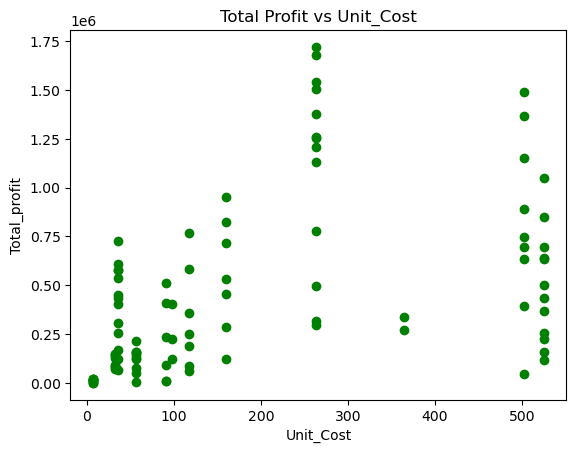

In [122]:
plt.scatter(df['Unit_Cost'],df['Total_Profit'],color='green')
plt.title('Total Profit vs Unit_Cost')
plt.xlabel('Unit_Cost')
plt.ylabel('Total_profit')

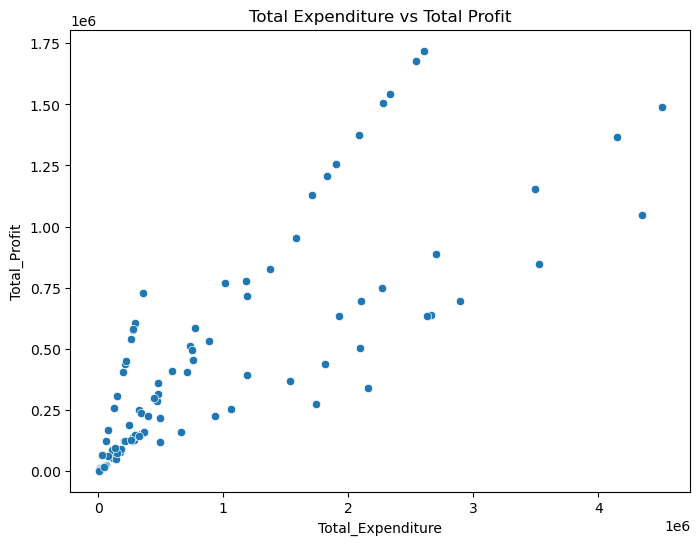

In [128]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total_Expenditure', y='Total_Profit', data=df)
plt.title('Total Expenditure vs Total Profit')
plt.show()


Text(0, 0.5, 'Total_profit')

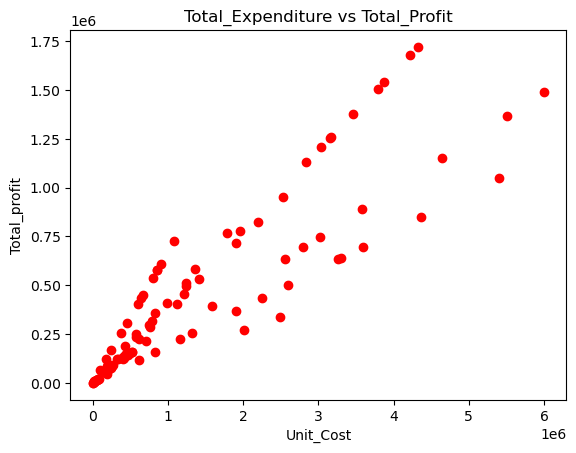

In [124]:
plt.scatter(df['Total_Revenue'],df['Total_Profit'],color='red')
plt.title('Total_Expenditure vs Total_Profit')
plt.xlabel('Unit_Cost')
plt.ylabel('Total_profit')

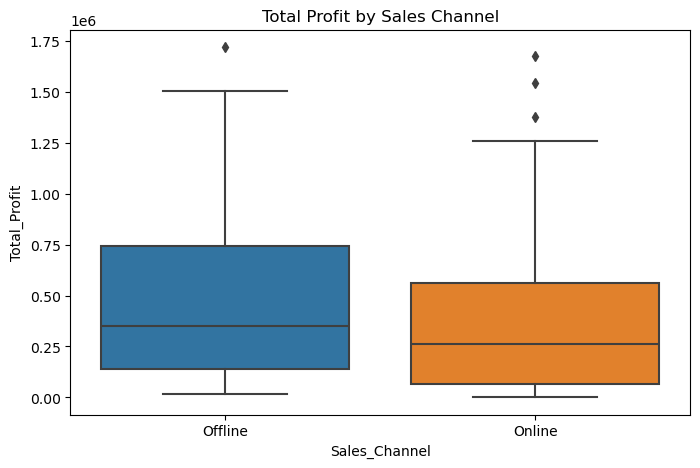

In [127]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sales_Channel', y='Total_Profit', data=df)
plt.title('Total Profit by Sales Channel')
plt.show()

# Model

In [133]:
dummie_data=pd.get_dummies(df,columns=['Region','Country','Item_Type','Sales_Channel','Order_Priority','Ship_Date'])

In [145]:
X=dummie_data.drop('Total_Profit',axis=1)
y=dummie_data['Total_Profit']

In [146]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

Taking total 10 alpha values in the range of 0.111 to 1.12 

In [167]:
alpha_values = np.linspace(0.111, 1.12, 10) 


In [168]:
results=[]

In [169]:
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train, Y_train)
    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append((alpha, mse, mae, rmse))
    print(f"Alpha: {alpha:.3f}, MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")

Alpha: 0.111, MSE: 136198009536.6864, MAE: 301421.9466, RMSE: 369050.1450
Alpha: 0.223, MSE: 136194180916.8130, MAE: 301417.8620, RMSE: 369044.9579
Alpha: 0.335, MSE: 136190352379.2676, MAE: 301413.7774, RMSE: 369039.7707
Alpha: 0.447, MSE: 136186523924.0499, MAE: 301409.6928, RMSE: 369034.5836
Alpha: 0.559, MSE: 136182695551.1602, MAE: 301405.6082, RMSE: 369029.3966
Alpha: 0.672, MSE: 136178867260.5981, MAE: 301401.5236, RMSE: 369024.2096
Alpha: 0.784, MSE: 136175039052.3639, MAE: 301397.4390, RMSE: 369019.0226
Alpha: 0.896, MSE: 136171210926.4573, MAE: 301393.3544, RMSE: 369013.8357
Alpha: 1.008, MSE: 136167382882.8788, MAE: 301389.2698, RMSE: 369008.6488
Alpha: 1.120, MSE: 136163554921.6281, MAE: 301385.1852, RMSE: 369003.4619


In [170]:
best_alpha, best_mse, best_mae, best_rmse = min(results, key=lambda x: x[3])
print(f"Best Alpha: {best_alpha:.3f}, Best MSE: {best_mse:.4f}, Best MAE: {best_mae:.4f}, Best RMSE: {best_rmse:.4f}")

Best Alpha: 1.120, Best MSE: 136163554921.6281, Best MAE: 301385.1852, Best RMSE: 369003.4619


In Conclusion Best alpha value for the given Lasso Regression is 1.120. As Alpha value increases bias value will be increased and variance value decreases.